# Dancer's business - 4. Get constants
In this notebook session, I will 
- select features for modeling with linear regression and goodness-of-fit test,
- calculate model constants.

Here, I'm looking for a feature that has a proportional relationship with the target feature.
This is stronger condition than simply having a positive correlation.
Whereas the positive correlation can be from coincidence of growing trends,
proportional relationship might imply a universal economic law, with fixed scaling constant. 
To find such feature, I'll perform a linear regression with 0 intercept, then perform a goodness of fit test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('data/dance3.csv')

In [3]:
# We don't need the rest for now
df = df[(df.area=='All')&(df.year>=1998)]

# Select a feature to predict dance studio revenue
- Values correlate with same industry
    - 'Fitness revenue': competitor industry revenue
    - 'Choreographer volume': similar job employment volume
    - 'Recreational worker volume': similar job employment volume
- Values correlate with potential customers
    - 'Resident population': number of potential customers
    - 'Employed resident population': number of potential customers who have income
    - 'Resident employment volume': economy size of potential customers

Fitness revenue
Goodness of fit (reduced chi-square) =  0.05235 

Employed resident population
Goodness of fit (reduced chi-square) =  0.05284 

Recreational worker volume
Goodness of fit (reduced chi-square) =  0.05651 

Resident employment volume
Goodness of fit (reduced chi-square) =  0.09024 

Resident population
Goodness of fit (reduced chi-square) =  0.10876 

Choreographer volume
Goodness of fit (reduced chi-square) =  1.56766 



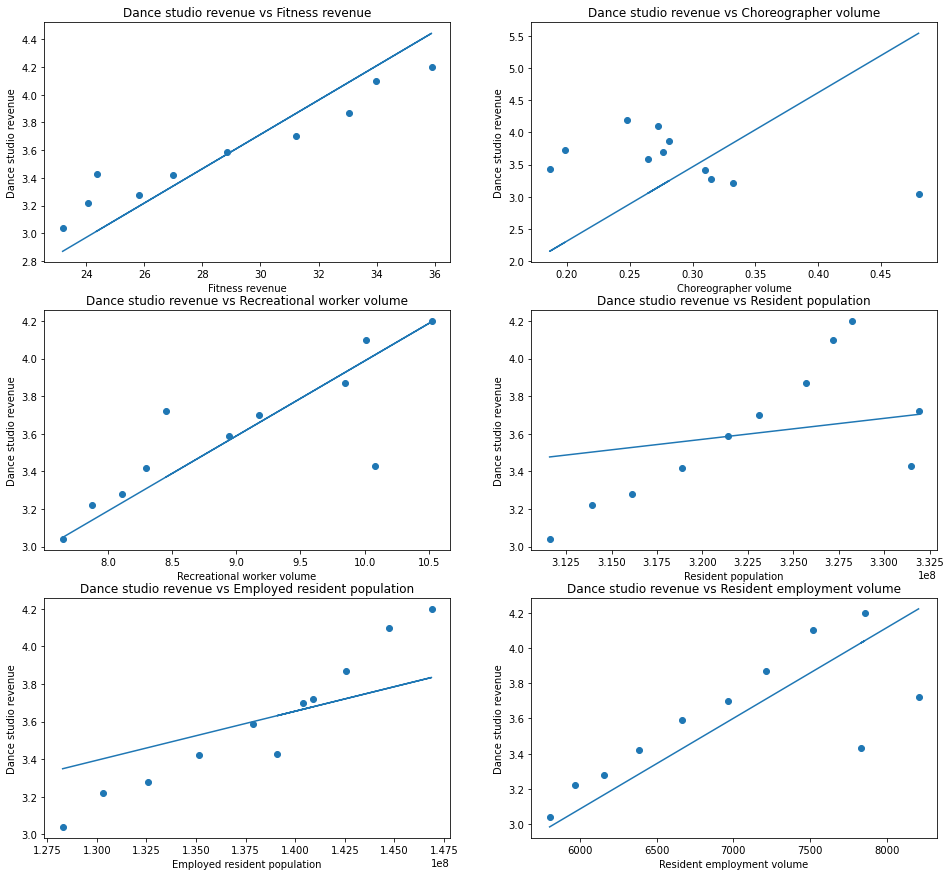

In [4]:
# feature to predict
y_item = 'dance_studio'
y_name = 'Dance studio revenue'

# features to compare
x_items = ['fitness','vol','vol', # same/similar industy
           'population','tot_emp','vol',] # potential customer size

# occ condition
x_conds = ['all_jobs','choreo','rec_worker', 
           'all_jobs','all_jobs','all_jobs']

# meanings
x_names = ['Fitness revenue', 
           'Choreographer volume', 
           'Recreational worker volume',
           'Resident population', 
           'Employed resident population', 
           'Resident employment volume']

### Make X and Y lists
X = []
Y = []

for i in range(len(x_items)):
    
    t = df[df.occ==x_conds[i]]
    
    x = t[x_items[i]]
    y = t[y_item]
    
    temp = pd.DataFrame({'x':x,'y':y})
    temp = temp.dropna()
    
    X.append(temp.x.to_numpy())
    Y.append(temp.y.to_numpy())

### Fit: Linear regression -----------
Y_pred = []

for i in range(len(x_items)):
    
    # Linear regression
    # fit_intercept=False for testing a proportional relationship
    model = LinearRegression(fit_intercept=False) 
    model.fit(X = X[i].reshape(-1, 1), y = Y[i])    

    Y_pred.append(model.predict(X[i].reshape(-1, 1)))
    
    
### Goodness-of-fit: Reduced chi-square ----------
G_fit = []

for i in range(len(x_items)):
    
    # degree of freedom
    nu = len(X[i])-2 
    
    # reduced chi-square
    # errors or data points are assumped to be same
    red_chisq = ((Y_pred[i]-Y[i])**2).sum()/nu
    
    #chisq, p = stats.chisquare(f_obs=Y[i], f_exp=Y_pred[i])
    G_fit.append((x_names[i],red_chisq))

    
G_fit.sort(key=lambda x:x[1])

for i in range(len(G_fit)): 
    print(G_fit[i][0])
    print('Goodness of fit (reduced chi-square) = ', round(G_fit[i][1],5), '\n')    
    
    
### Plot fit result ----------
    
plt.rcParams["figure.figsize"] = [16, 5*(len(x_items)//2)]

fig, ax_arr = plt.subplots(len(x_items)//2,2)#,constrained_layout=True)

for i in range(len(x_names)):
    
    title = y_name + ' vs ' + x_names[i]
    
    ax = ax_arr[i//2][i%2]

    x = X[i]
    y = Y[i]

    ax.scatter(x, y)
    ax.plot(x, Y_pred[i])
    ax.set_title(title)
    ax.set_xlabel(x_names[i])
    ax.set_ylabel(y_name)



- The **fitness revenue** gives the best prediction of the dance studio revenue, followed by **employed resident population** and **recreational worker volume**.
- Contrary to naive prediction, **choreographer volume doesn't show any correlation** with the dance studio revenue.

## Calculate $r_{biz}=R_{Dance}/R_{Gym}$

In [5]:
# add r_biz column
t = df[df.occ=='all_jobs']

r_biz = (t.dance_studio/t.fitness).dropna()

r_biz_mean = r_biz.mean()
r_biz_err = r_biz.std()/(r_biz.count()-1)**0.5

# print r_biz
print('r_biz = ',round(r_biz_mean,5),"+-",round(r_biz_err,5))

r_biz =  0.12574 +- 0.00262


<font color=blue>**The revenue of dance studio industry is 13% of that of fitness industry.**</font>

# Select a feature to predict fitness volume
We will select a feature which is available for local area.
- Values correlate with same industry
    - 'Fitness trainer + Recreational worker volume': employment volume
    - 'Fitness trainer volume': partial employment volume
    - 'Recreational worker volume': partial employment volume
- Values correlate with potential customers
    - 'Resident population': number of potential customers
    - 'Employed resident population': number of potential customers who have income
    - 'Resident employment volume': economy size of potential customers

All fiitness industry workers
Goodness of fit (reduced chi-square) =  3.78406 

Recreational worker volume
Goodness of fit (reduced chi-square) =  5.3499 

Fitness trainer volume
Goodness of fit (reduced chi-square) =  5.99758 

Resident employment volume
Goodness of fit (reduced chi-square) =  8.13764 

Employed resident population
Goodness of fit (reduced chi-square) =  25.0181 

Resident population
Goodness of fit (reduced chi-square) =  38.72906 



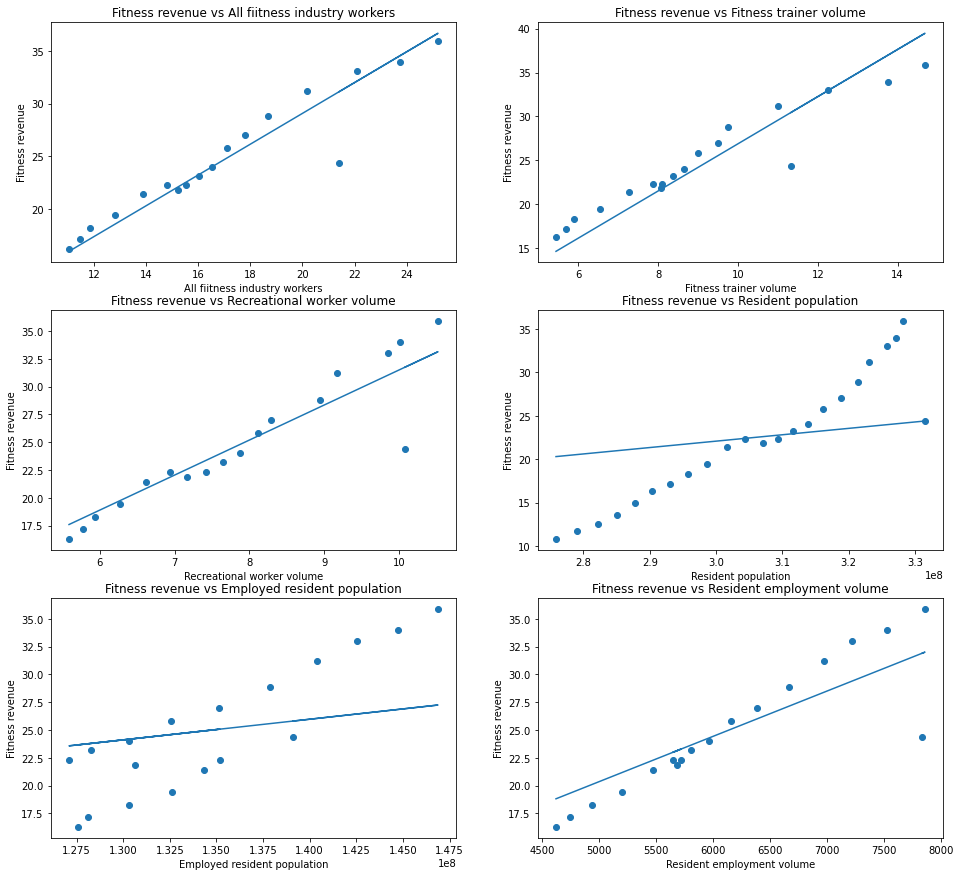

In [6]:
# feature to predict
y_item = 'fitness'
y_name = 'Fitness revenue'

# features to compare
x_items = ['vol','vol','vol', # same/similar industy
           'population','tot_emp','vol',] # potential customer size

# occ condition
x_conds = ['fitness_biz','fit_trainer','rec_worker', 
           'all_jobs','all_jobs','all_jobs']

# meanings
x_names = ['All fiitness industry workers', 
           'Fitness trainer volume', 
           'Recreational worker volume',
           'Resident population', 
           'Employed resident population', 
           'Resident employment volume']

### Make X and Y lists
X = []
Y = []

for i in range(len(x_items)):
    
    t = df[df.occ==x_conds[i]]
    
    x = t[x_items[i]]
    y = t[y_item]
    
    temp = pd.DataFrame({'x':x,'y':y})
    temp = temp.dropna()
    
    X.append(temp.x.to_numpy())
    Y.append(temp.y.to_numpy())

### Fit: Linear regression -----------
Y_pred = []

for i in range(len(x_items)):
    
    # Linear regression
    # fit_intercept=False for testing a proportional relationship
    model = LinearRegression(fit_intercept=False) 
    model.fit(X = X[i].reshape(-1, 1), y = Y[i])    

    Y_pred.append(model.predict(X[i].reshape(-1, 1)))
    
    
### Goodness-of-fit: Reduced chi-square ----------
G_fit = []

for i in range(len(x_items)):
    
    # degree of freedom
    nu = len(X[i])-2 
    
    # reduced chi-square
    # errors or data points are assumped to be same
    red_chisq = ((Y_pred[i]-Y[i])**2).sum()/nu
    
    #chisq, p = stats.chisquare(f_obs=Y[i], f_exp=Y_pred[i])
    G_fit.append((x_names[i],red_chisq))

    
G_fit.sort(key=lambda x:x[1])

for i in range(len(G_fit)): 
    print(G_fit[i][0])
    print('Goodness of fit (reduced chi-square) = ', round(G_fit[i][1],5), '\n')    
    
    
### Plot fit result ----------
    
plt.rcParams["figure.figsize"] = [16, 5*(len(x_items)//2)]

fig, ax_arr = plt.subplots(len(x_items)//2,2)#,constrained_layout=True)

for i in range(len(x_names)):
    
    title = y_name + ' vs ' + x_names[i]
    
    ax = ax_arr[i//2][i%2]

    x = X[i]
    y = Y[i]

    ax.scatter(x, y)
    ax.plot(x, Y_pred[i])
    ax.set_title(title)
    ax.set_xlabel(x_names[i])
    ax.set_ylabel(y_name)



- The **total fitness employment volume** gives the best prediction of the fitness revenue, followed by **partial employment volume**. This result makes sense. The fitness revenue is "fitness and recreational sports centers" revenue.
- The other parameters also show positive correlation, but that's probably because all of them are growing.

## Calculate $g_{rev}=R_{Gym}/V_{Gym}$

### Error propagation

- Uncertainty of $R/V$ where $R$ is a constant

$$\sigma_{R/V} = R/V*\sigma_{V}/V = \frac{R\sigma_{V}}{V^2}$$

- Take average for different uncertainties

$$stat~weighted~mean = \frac{x/\sigma_x^2+y/\sigma_y^2}{1/\sigma_x^2+1/\sigma_y^2}$$

$$stat~weighted~mean~error = \frac{1}{\sqrt{1/\sigma_x^2+1/\sigma_y^2}}$$

Recursively applying this method can take the average of more than two variables.


In [7]:
def ep_const_div(a,x):
        
        return a/x

def ep_const_div_err(a,x,ex):
        
        return a*ex/x**2
    
def ep_stat_mean(x,y,ex,ey):
    
    wx = 1/ex**2
    wy = 1/ey**2
    
    return (x*wx + y*wy)/(wx+wy)

def ep_stat_mean_err(x,y,ex,ey):
    
    wx = 1/ex**2
    wy = 1/ey**2
        
    return (1/(wx+wy)**0.5)

def recur_ep_stat_mean(x,ex):
    
    if len(x)<1:
        return False
    if len(x)==1:
        return x[0], ex[0]
    
    part_mean = ep_stat_mean(x[0],x[1],ex[0],ex[1])
    part_err= ep_stat_mean_err(x[0],x[1],ex[0],ex[1])
    
    if len(x)==2:
        return part_mean, part_err
    
    for i in range(2,len(x)):
        
        temp_mean = ep_stat_mean(part_mean,x[i],part_err,ex[i])
        temp_err= ep_stat_mean_err(part_mean,x[i],part_err,ex[i])
        
        part_mean = temp_mean
        part_err = temp_err
        
    
    return part_mean, part_err

In [8]:
# add g_rev column -- to be updated later with error propagation
t = df[df.occ=='fitness_biz']

g_rev = (t.fitness/t.vol).dropna()

g_rev_mean = g_rev.mean()
g_rev_err = g_rev.std()/(g_rev.count()-1)**0.5


# print r_biz
print('g_rev = ',round(g_rev_mean,5),"+-",round(g_rev_err,5))

g_rev =  1.47079 +- 0.02269


<font color=blue>**The revenue of fitness industry is 1.5 times of the fitness employment volume.**</font>

# Select a feature to predict number of studio
We will select a feature which is available for local area.
- Values correlate with same industry
    - 'Dance studio industry': it might be too obvious
    - 'Choreographer volume': similar business
    - 'Recreational worker volume': similar business
- Values correlate with potential customers
    - 'Resident population': number of potential customers
    - 'Employed resident population': number of potential customers who have income
    - 'Resident employment volume': economy size of potential customers

Resident employment volume
Goodness of fit (reduced chi-square) =  2016831.02925 

Recreational worker volume
Goodness of fit (reduced chi-square) =  24784058.23049 

Dance studio industry revenue
Goodness of fit (reduced chi-square) =  25229804.5519 

Employed resident population
Goodness of fit (reduced chi-square) =  28346691.41018 

Resident population
Goodness of fit (reduced chi-square) =  37537234.28339 

Choreographer volume
Goodness of fit (reduced chi-square) =  294023715.47714 



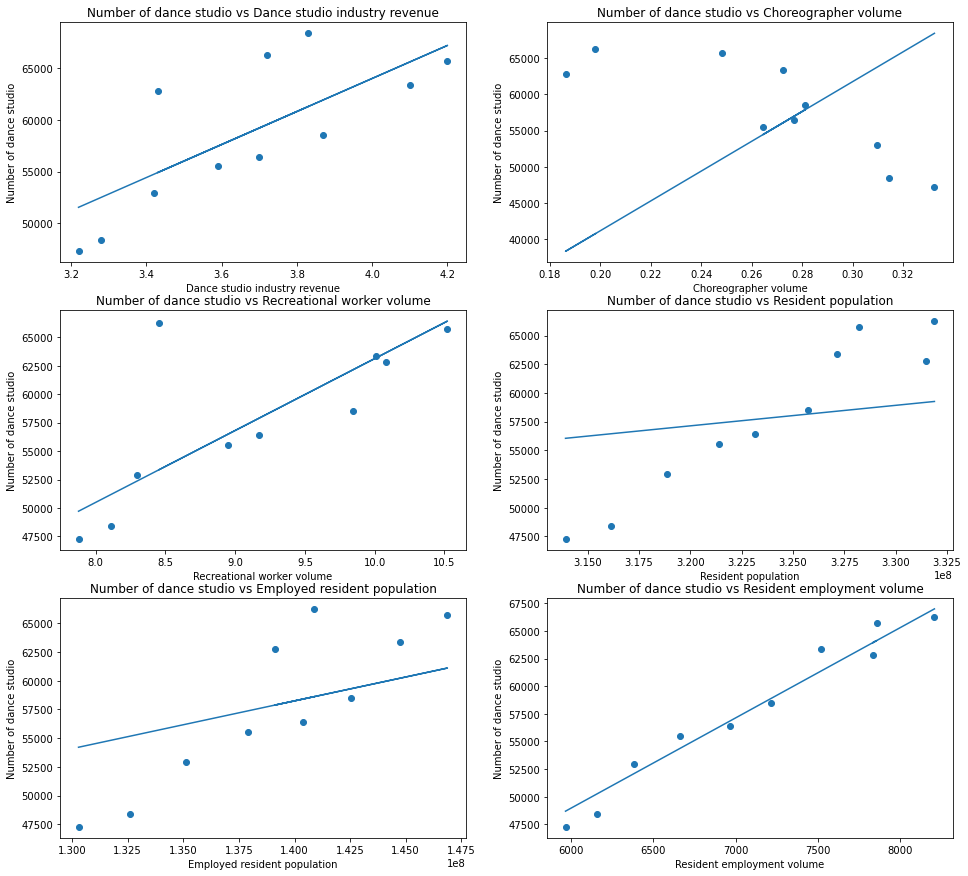

In [9]:
# feature to predict
y_item = 'studio_num'
y_name = 'Number of dance studio'

# features to compare
x_items = ['dance_studio','vol','vol', # same/similar industy
           'population','tot_emp','vol',] # potential customer size

# occ condition
x_conds = ['all_jobs','choreo','rec_worker', 
           'all_jobs','all_jobs','all_jobs']

# meanings
x_names = ['Dance studio industry revenue', 
           'Choreographer volume', 
           'Recreational worker volume',
           'Resident population', 
           'Employed resident population', 
           'Resident employment volume']

### Make X and Y lists
X = []
Y = []

for i in range(len(x_items)):
    
    t = df[df.occ==x_conds[i]]
    
    x = t[x_items[i]]
    y = t[y_item]
    
    temp = pd.DataFrame({'x':x,'y':y})
    temp = temp.dropna()
    
    X.append(temp.x.to_numpy())
    Y.append(temp.y.to_numpy())

### Fit: Linear regression -----------
Y_pred = []

for i in range(len(x_items)):
    
    # Linear regression
    # fit_intercept=False for testing a proportional relationship
    model = LinearRegression(fit_intercept=False) 
    model.fit(X = X[i].reshape(-1, 1), y = Y[i])    

    Y_pred.append(model.predict(X[i].reshape(-1, 1)))
    
    
### Goodness-of-fit: Reduced chi-square ----------
G_fit = []

for i in range(len(x_items)):
    
    # degree of freedom
    nu = len(X[i])-2 
    
    # reduced chi-square
    # errors or data points are assumped to be same
    red_chisq = ((Y_pred[i]-Y[i])**2).sum()/nu
    
    #chisq, p = stats.chisquare(f_obs=Y[i], f_exp=Y_pred[i])
    G_fit.append((x_names[i],red_chisq))

    
G_fit.sort(key=lambda x:x[1])

for i in range(len(G_fit)): 
    print(G_fit[i][0])
    print('Goodness of fit (reduced chi-square) = ', round(G_fit[i][1],5), '\n')    
    
    
### Plot fit result ----------
    
plt.rcParams["figure.figsize"] = [16, 5*(len(x_items)//2)]

fig, ax_arr = plt.subplots(len(x_items)//2,2)#,constrained_layout=True)

for i in range(len(x_names)):
    
    title = y_name + ' vs ' + x_names[i]
    
    ax = ax_arr[i//2][i%2]

    x = X[i]
    y = Y[i]

    ax.scatter(x, y)
    ax.plot(x, Y_pred[i])
    ax.set_title(title)
    ax.set_xlabel(x_names[i])
    ax.set_ylabel(y_name)



- The **total resident employment volume** gives the best prediction of the **number of dance studio**. 
- So, while the dance studio revenue follows the fitness revenue (and therefore, fitness employment volume), the number of studio follows the total resident employment volume. It is intersting.

## Calculate $\rho_{studio}=N_{Studio}/V_{All~jobs}$

In [10]:
# add g_rev column -- to be updated later with error propagation
t = df[df.occ=='all_jobs']

rho = (t.studio_num/t.vol).dropna()

rho_mean = rho.mean()
rho_err = rho.std()/(rho.count()-1)**0.5

# print r_biz
print('rho = ',round(rho_mean,5),"+-",round(rho_err,5))

rho =  8.14999 +- 0.06479


<font color=blue>**The studio density is 8.1. It means there is one dance studio per 120 million dollars of annual income.**</font>
Saying average annual salary is 50k, this number corresponds to 2400 residents.

# Update dataset

In [11]:
# Read again
df_read = pd.read_csv('data/dance3.csv')

df_read['r_biz'] = r_biz_mean
df_read['r_biz_err'] = r_biz_err

df_read['g_rev'] = g_rev_mean
df_read['g_rev_err'] = g_rev_err
df_read['rho'] = rho_mean
df_read['rho_err'] = rho_err


# Update dataset
df_read.to_csv('data/dance4.csv',index=False)